In [1]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

class FolderClassifier:
    def __init__(self):
        self.vectorizer = CountVectorizer()
        self.classifier = RandomForestClassifier()

    def _load_dataframe(self, file_path):
        df = pd.read_csv(file_path, header=None)
        return df

    def _prepare_data(self, folder_path):
        X = []
        y = []
        for root, dirs, files in os.walk(folder_path):
            for file_name in files:
                file_path = os.path.join(root, file_name)
                folder_name = os.path.basename(os.path.dirname(file_path))
                df = self._load_dataframe(file_path)
                words = df.iloc[:, 0].astype(str).tolist()
                X.append(" ".join(words))
                y.append(folder_name)
        return X, y

    def train(self, folder1_path, folder2_path):
        X1, y1 = self._prepare_data(folder1_path)
        X2, y2 = self._prepare_data(folder2_path)
        X = X1 + X2
        y = y1 + y2
        X = self.vectorizer.fit_transform(X)
        self.classifier.fit(X, y)

    def predict(self, file_path):
        df = self._load_dataframe(file_path)
        words = df.iloc[:, 0].astype(str).tolist()
        X = self.vectorizer.transform([" ".join(words)])
        prediction = self.classifier.predict(X)
        return prediction[0]
    def save_model(self, file_path):
        dump((self.vectorizer, self.classifier), file_path)

    def load_model(self, file_path):
        self.vectorizer, self.classifier = load(file_path)


In [2]:
import os
import pandas as pd

def predict_folder(test_folder, model):
    file_predictions = []
    for root, dirs, files in os.walk(test_folder):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            prediction = model.predict(file_path)
            file_predictions.append((file_name, prediction))
    df = pd.DataFrame(file_predictions, columns=['File Name', 'Prediction'])
    return df


In [3]:
def add_label_column(dataframe):
    dataframe["Label"] = dataframe["File Name"].apply(lambda x: "GPT" if x.lower().startswith("write me") else "Real")
    return dataframe


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

def evaluate_predictions(df):
    y_true = df['Label'].values
    y_pred = df['Prediction'].values

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Create confusion matrix
    confusion = confusion_matrix(y_true, y_pred)
    labels = np.unique(df[['Label', 'Prediction']].values)
    cm_df = pd.DataFrame(confusion, index=labels, columns=labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return accuracy, cm_df


In [5]:
fp = r'Experiments\Model-Data-Gathering1\Harry_Potter\experiment-1\Signatures\Harry Potter - Blue Crows - Danielle Riddle.csv-Signature.csv'


In [21]:
def model_wrapper(real_path , gpt_path, test_path):
    model = FolderClassifier()
    model.train(real_path, gpt_path)
    res = predict_folder(test_path , model)
    res = add_label_column(res)
    accuracy, confusion_matrix = evaluate_predictions(res.copy())
    print("Accuracy Score is: ", accuracy)
    return res , model

## Harry - Potter Model

In [22]:

# Example usage
harry_model = FolderClassifier()

# Train the classifier
folder1_path = r'Data-For-Model\Harry_Potter\Real'
folder2_path = r'Data-For-Model\Harry_Potter\GPT'
test_path = r'Data-For-Model\Harry_Potter\Test'
harry_model.train(folder1_path, folder2_path)




In [23]:
h_potter_res = predict_folder(test_path,harry_model)

In [24]:
h_potter_res

,File Name,Prediction
0,Harry Potter - Quill of the King - History can...,Real
1,Harry Potter - Quill's And Parchment - I Am Re...,Real
2,Harry Potter - Quills-messyhands - Potion Fail...,Real
3,Harry Potter - quillstrike - Outtakes.csv-Sign...,Real
4,Harry Potter - Qwerts - Fire's Shadow.csv-Sign...,Real
...,...,...
88,Write me a fan fiction about How Harry Potter ...,Real
89,Write me a fan fiction about Hufflepuff gettin...,GPT
90,Write me a fan fiction about Ron Wiseley's old...,GPT
91,Write me a fan fiction about Ron Wiseley's you...,Real


In [25]:
h_potter_res = add_label_column(h_potter_res.copy())

In [26]:
h_potter_res

,File Name,Prediction,Label
0,Harry Potter - Quill of the King - History can...,Real,Real
1,Harry Potter - Quill's And Parchment - I Am Re...,Real,Real
2,Harry Potter - Quills-messyhands - Potion Fail...,Real,Real
3,Harry Potter - quillstrike - Outtakes.csv-Sign...,Real,Real
4,Harry Potter - Qwerts - Fire's Shadow.csv-Sign...,Real,Real
...,...,...,...
88,Write me a fan fiction about How Harry Potter ...,Real,GPT
89,Write me a fan fiction about Hufflepuff gettin...,GPT,GPT
90,Write me a fan fiction about Ron Wiseley's old...,GPT,GPT
91,Write me a fan fiction about Ron Wiseley's you...,Real,GPT


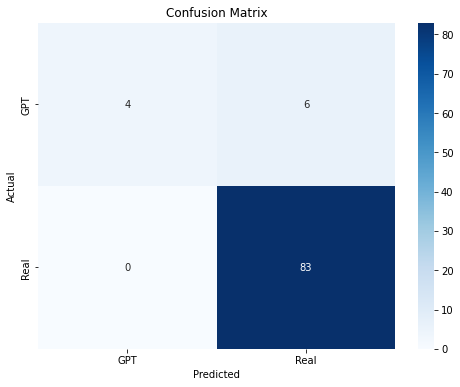

In [27]:
accuracy, confusion_matrix = evaluate_predictions(h_potter_res)

In [28]:
print(confusion_matrix)

      GPT  Real
GPT     4     6
Real    0    83


In [29]:
accuracy

0.9354838709677419

## Warcraft

In [30]:
# Train the classifier
w_real_path = r'Data-For-Model\Warcraft\Real'
w_gpt_path = r'Data-For-Model\Warcraft\GPT'
w_test_path = r'Data-For-Model\Warcraft\Test'




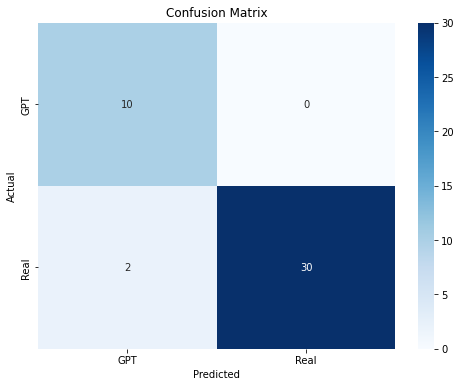

Accuracy Score is:  0.9523809523809523


In [33]:
w_res , w_model = model_wrapper(w_real_path , w_gpt_path, w_test_path)

## twilight

In [34]:
# Train the classifier
tw_real_path = r'Data-For-Model\twilight\Real'
tw_gpt_path = r'Data-For-Model\twilight\GPT'
tw_test_path = r'Data-For-Model\twilight\Test'


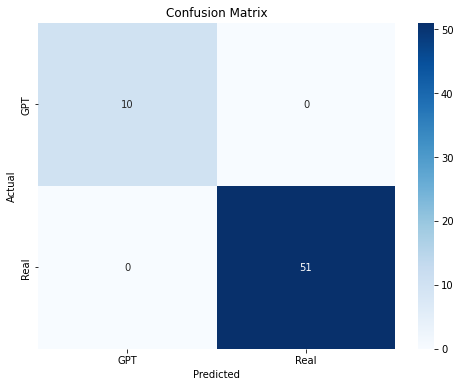

Accuracy Score is:  1.0


In [35]:
tw_res , tw_model = model_wrapper(tw_real_path , tw_gpt_path, tw_test_path)

In [36]:
tw_res

,File Name,Prediction,Label
0,Twilight - ttfan111robstar1 - Mommy_ Please Do...,Real,Real
1,Twilight - ttfan111robstar1 - You Made Us Who ...,Real,Real
2,Twilight - TTJColeman - True Love.csv-Signatur...,Real,Real
3,Twilight - TTJColeman - When Fire Meets Ice.cs...,Real,Real
4,Twilight - TurnItUp03 - Meant To Be.csv-Signat...,Real,Real
...,...,...,...
56,Write me a Twilight fan fiction about a signif...,GPT,GPT
57,Write me a Twilight fan fiction about a surpri...,GPT,GPT
58,Write me a Twilight fan fiction about a time w...,GPT,GPT
59,Write me a Twilight fan fiction about a timetr...,GPT,GPT


## pok_mon

In [37]:
# Train the classifier
p_real_path = r'Data-For-Model\pok_mon\Real'
p_gpt_path = r'Data-For-Model\pok_mon\GPT'
p_test_path = r'Data-For-Model\pok_mon\Test'

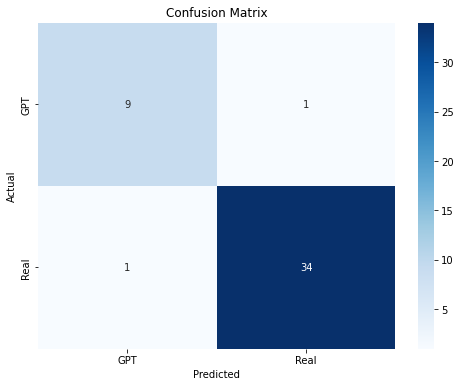

Accuracy Score is:  0.9555555555555556


In [38]:
p_res , p_model = model_wrapper(p_real_path , p_gpt_path, p_test_path)

### lord_of_the_rings

In [39]:
# Train the classifier
lotr_real_path = r'Data-For-Model\lord_of_the_rings\Real'
lotr_gpt_path = r'Data-For-Model\lord_of_the_rings\GPT'
lotr_test_path = r'Data-For-Model\lord_of_the_rings\Test'

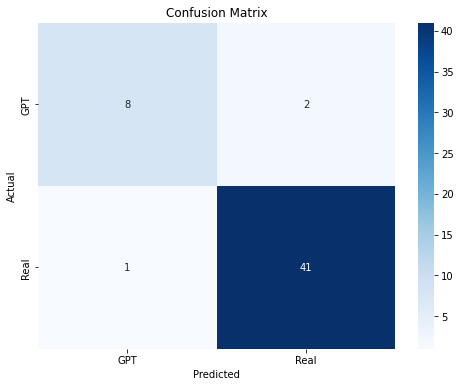

Accuracy Score is:  0.9423076923076923


In [40]:
lotr_res , lotr_model = model_wrapper(lotr_real_path , lotr_gpt_path, lotr_test_path)

In [41]:
lotr_res

,File Name,Prediction,Label
0,Lord of the Rings - d'elfe - Innocence's journ...,Real,Real
1,Lord of the Rings - D.L. Fercy - The Lost Chil...,Real,Real
2,Lord of the Rings - Da.Hybrid.Queen - My Broth...,Real,Real
3,Lord of the Rings - Daeril Ullothwen - More Th...,Real,Real
4,Lord of the Rings - Dagorloth - An Innocent Ga...,Real,Real
5,Lord of the Rings - Dance of the Dead - White ...,Real,Real
6,Lord of the Rings - Dancing like Garrus - Drin...,Real,Real
7,Lord of the Rings - DancingChestnut - Wanderin...,Real,Real
8,Lord of the Rings - Danigirltuesday - Among th...,Real,Real
9,Lord of the Rings - dansesinfernale - unrequit...,Real,Real


## Combined

In [42]:
# Train the classifier
combined_real_path = r'Data-For-Model\Combined\Real'
combined_gpt_path = r'Data-For-Model\Combined\GPT'
combined_test_path = r'Data-For-Model\Combined\Test'

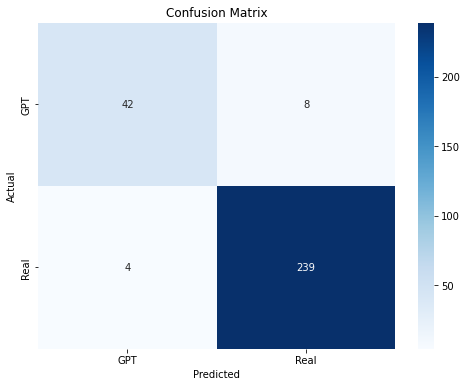

Accuracy Score is:  0.9590443686006825


In [43]:
p_res , p_model = model_wrapper(combined_real_path , combined_gpt_path, combined_test_path)

In [ ]:
import os
import shutil

def copy_files_with_prefix(folder_path, destination_folder, start = "write me"):
    # Iterate over the subfolders in the given folder path
    for root, dirs, files in os.walk(folder_path):
        # Check if the "Signatures" folder exists
        if "Signatures" in dirs:
            signature_folder = os.path.join(root, "Signatures")
            # Iterate over the files in the "Signatures" folder
            for file_name in os.listdir(signature_folder):
                # Check if the file starts with "write me" (case insensitive)
                if file_name.lower().startswith(start.lower()):
                    source_file_path = os.path.join(signature_folder, file_name)
                    destination_file_path = os.path.join(destination_folder, file_name)
                    # Copy the file to the destination folder
                    shutil.copy2(source_file_path, destination_file_path)


In [7]:
copy_files_with_prefix("Experiments/Model-Data-Gathering1/Warcraft","Data-For-Model/Warcraft/GPT")

NameError: name 'copy_files_with_prefix' is not defined

In [8]:
data_folders = ["Harry_Potter" , "lord_of_the_rings", "pok_mon" , "twilight" , "Warcraft"]

In [10]:
for folder in data_folders:
    copy_files_with_prefix("Experiments/Model-Data-Gathering1/"+folder,"Data-For-Model/"+folder+"/GPT")